# Data preprocessing

# import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/Crude Oil Prices Daily.xlsx')

In [ ]:
data.head(20)

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
5,1986-01-09,26.03
6,1986-01-10,25.65
7,1986-01-13,25.08
8,1986-01-14,24.97
9,1986-01-15,25.18


In [ ]:
data.tail(15)

,Date,Closing Value
8208,2018-06-19,65.09
8209,2018-06-20,65.92
8210,2018-06-21,65.68
8211,2018-06-22,69.02
8212,2018-06-25,69.91
8213,2018-06-26,75.23
8214,2018-06-27,77.41
8215,2018-06-28,73.45
8216,2018-06-29,74.13
8217,2018-07-02,73.89


# Handling the Missing Values

In [ ]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [ ]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [ ]:

data['Date'].mean()

Timestamp('2002-04-05 22:11:15.082086912')

In [ ]:
data['Closing Value'].median()

29.61

In [ ]:
data['Closing Value'].mode()

0    18.63
1    20.38
dtype: float64

In [ ]:
data['Date'].fillna(data['Date'].mean(),inplace=True)

In [ ]:
data

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78


In [ ]:
data['Date'].fillna(data['Date'].median(),inplace=True)

In [ ]:
data['Closing Value'].fillna(data['Closing Value'].mode(),inplace=True)

In [ ]:
data

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78


In [ ]:
data.head(20)

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
5,1986-01-09,26.03
6,1986-01-10,25.65
7,1986-01-13,25.08
8,1986-01-14,24.97
9,1986-01-15,25.18


In [ ]:
data.describe()

,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [ ]:
data_oil=data.reset_index()['Closing Value']

In [ ]:
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

# feature scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [ ]:
sc =MinMaxScaler()

In [ ]:
scaled_training = sc.fit_transform(data_oil)

In [ ]:
scaled_training

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

In [ ]:
scaled_testing = sc.fit_transform(data_oil)

In [ ]:
scaled_testing

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

# Data Visualization

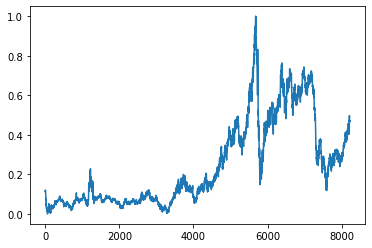

In [ ]:
plt.plot(data_oil)

# Split the Data into Train & Test

In [ ]:
# independendant and dependant varibles
x_train = []
y_train = []

In [ ]:
scaled_training.shape

(8216, 1)

In [ ]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [ ]:
training_size,test_size

(5340, 2876)

In [ ]:
train_data.shape

(5340, 1)

# Creating A Dataset with silding windows

In [ ]:
##convert an array of values into a dataset matrix
def create_dataset (dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
#reshape into X=t,t 1, t 2, t 3 and Y=t14
time_step = 10
x_train,y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(x_train.shape), print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [ ]:
print(x_test.shape), print(y_test.shape)

(2865, 10)
(2865,)


(None, None)

In [ ]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [ ]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test =x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [ ]:
x_train

array([[[0.11335703],
        [0.11661484],
        [0.12053902],
        ...,
        [0.10980305],
        [0.1089886 ],
        [0.11054346]],

       [[0.11661484],
        [0.12053902],
        [0.11550422],
        ...,
        [0.1089886 ],
        [0.11054346],
        [0.10165852]],

       [[0.12053902],
        [0.11550422],
        [0.1156523 ],
        ...,
        [0.11054346],
        [0.10165852],
        [0.09906708]],

       ...,

       [[0.36731823],
        [0.35176958],
        [0.36080261],
        ...,
        [0.36391234],
        [0.37042796],
        [0.37042796]],

       [[0.35176958],
        [0.36080261],
        [0.35354657],
        ...,
        [0.37042796],
        [0.37042796],
        [0.37879461]],

       [[0.36080261],
        [0.35354657],
        [0.35295424],
        ...,
        [0.37042796],
        [0.37879461],
        [0.37916482]]])

In [ ]:
x_test

array([[[0.38005331],
        [0.36872501],
        [0.37324152],
        ...,
        [0.3537687 ],
        [0.35465719],
        [0.3499926 ]],

       [[0.36872501],
        [0.37324152],
        [0.38205242],
        ...,
        [0.35465719],
        [0.3499926 ],
        [0.3465867 ]],

       [[0.37324152],
        [0.38205242],
        [0.38042352],
        ...,
        [0.3499926 ],
        [0.3465867 ],
        [0.34355101]],

       ...,

       [[0.40604176],
        [0.41218718],
        [0.41041019],
        ...,
        [0.46794017],
        [0.47297497],
        [0.47119799]],

       [[0.41218718],
        [0.41041019],
        [0.43513994],
        ...,
        [0.47297497],
        [0.47119799],
        [0.47341922]],

       [[0.41041019],
        [0.43513994],
        [0.4417296 ],
        ...,
        [0.47119799],
        [0.47341922],
        [0.46497853]]])

In [ ]:
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model= Sequential()

Adding LSTM Layer

In [ ]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

Output Layer

In [ ]:
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Configure the Learning Process

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

Train the Model

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 9s 40ms/step - loss: 0.0020 - val_loss: 8.2699e-04
Epoch 2/50
84/84 [==============================] - 2s 24ms/step - loss: 1.2548e-04 - val_loss: 7.7065e-04
Epoch 3/50
84/84 [==============================] - 2s 24ms/step - loss: 1.2288e-04 - val_loss: 7.8564e-04
Epoch 4/50
84/84 [==============================] - 2s 24ms/step - loss: 1.3105e-04 - val_loss: 8.5406e-04
Epoch 5/50
84/84 [==============================] - 2s 24ms/step - loss: 1.3607e-04 - val_loss: 8.5440e-04
Epoch 6/50
84/84 [==============================] - 2s 24ms/step - loss: 1.2241e-04 - val_loss: 8.0580e-04
Epoch 7/50
84/84 [==============================] - 2s 24ms/step - loss: 1.2112e-04 - val_loss: 7.7663e-04
Epoch 8/50
84/84 [==============================] - 2s 24ms/step - loss: 1.1859e-04 - val_loss: 7.4617e-04
Epoch 9/50
84/84 [==============================] - 2s 24ms/step - loss: 1.2778e-04 - val_loss: 7.6276e-04
Epoch 10/50
84/84 [======================

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_data) 
test_predict=scaler.inverse_transform(test_data)
### Calculate RMSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_data,train_predict))

29.347830443269938

save the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:

model.save("crude_oil.h5")

Test the Model

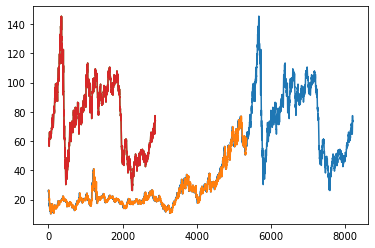

In [ ]:
##plotting
##shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(data_oil)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
## shift test predictions for plotting
testPredictplot = np.empty_like(data)
testPredictplot[:,: ] = np.nan
testPredictplot[look_back:len(test_predict)+look_back, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_oil))
plt.plot(trainPredictPlot)
plt.plot(testPredictplot)
plt.show()

In [ ]:
len(test_data)

2876

In [ ]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [ ]:
temp_input=list(x_input) 
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [ ]:
lst_output=[]
n_steps=10
i=0
while(i<10):
    if(len(temp_input)>10):
#print(temp_input)
       x_input=np.array(temp_input[1:]) 
       print("{} day input {}".format(i,x_input))
       x_input=x_input.reshape(1,-1)
       x_input = x_input.reshape((1, n_steps, 1)) #print(x_input)
       yhat = model.predict(x_input, verbose=0)
       print("{} day output {}".format(i,yhat))
       temp_input.extend(yhat[0].tolist())
       temp_input=temp_input[1:] #print(temp_input)
       lst_output.extend(yhat.tolist())
       i=i+1
    else:
       x_input = x_input.reshape((1, n_steps,1))
       yhat = model.predict(x_input, verbose=0)
       print(yhat[0])
       temp_input.extend(yhat[0].tolist()) 
       print(len(temp_input))
       lst_output.extend(yhat.tolist())
       i=i+1

[0.46699706]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.46699706]
1 day output [[0.46219343]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.46699706 0.46219343]
2 day output [[0.45658037]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.46699706 0.46219343 0.45658037]
3 day output [[0.45064297]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.46699706 0.46219343 0.45658037 0.45064297]
4 day output [[0.4451336]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.46699706
 0.46219343 0.45658037 0.45064297 0.4451336 ]
5 day output [[0.4401961]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.46699706 0.46219343
 0.45658037 0.45064297 0.4451336  0.4401961 ]
6 day output [[0.43590426]]
7 day input [0.46497853 0.47038353 0.47149415 0.46699706 0.46219343 

In [ ]:
day_new=np.arange(1,11) 
day_pred=np.arange(11,21)
len(data)

8216

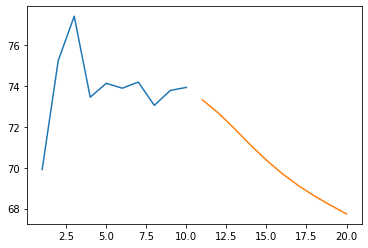

In [ ]:
plt.plot(day_new, scaler.inverse_transform(data_oil[8206:])) 
plt.plot(day_pred, scaler.inverse_transform(lst_output))

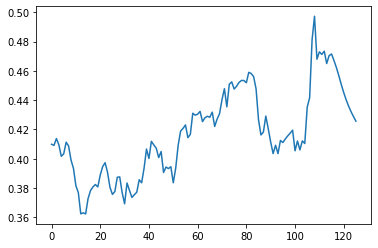

In [ ]:
df3=data_oil.tolist() 
df3.extend(lst_output) 
plt.plot(df3[8100:])

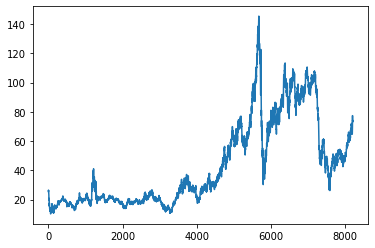

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(scaler.inverse_transform(data_oil))

import libraries

In [ ]:
! env/bin/activate

/bin/bash: env/bin/activate: No such file or directory


In [ ]:
!pip install flask.app

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92 kB 5.4 MB/s 
     |████████████████████████████████| 2.9 MB 61.7 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 209 kB 53.8 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
  Created wheel for Flask-Testing: filename=Flask_Testing-0.7.1-py3-none-any.whl size=8180 sha256=f280845147878d5f9b6ebd724fb0dcf7a7e38a9a2f04bf4b5838f14003577730
  Stored in directory: /root/.cache/pip/wheels/fc/39/b4/9080ae08cb7d974d07c9c3cab042d374366916fee7d038ef9a
Successfully built Flask-Testing
  Attempting uninstall: Flask
    Found existing installation: Flask 1.1.4
    Uninstalling Flask-1.1.4:
      Successfully uninstalled Flask-1.1.4


In [ ]:
! app.py

/bin/bash: app.py: command not found


In [ ]:
!import FLASK_APP=app

/bin/bash: import: command not found


In [ ]:
!export FLASK_ENV=development

In [ ]:
!flask run

 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
Usage: flask run [OPTIONS]

Error: Could not locate a Flask application. You did not provide the "FLASK_APP" environment variable, and a "wsgi.py" or "app.py" module was not found in the current directory.


In [ ]:
import numpy as np
from flask import Flask,render_template,request #flask is a application
#uesd to run/serve our application
#request is used to access the files which is uploaded by the user in
#our application 
#render_template is used for rendering the html pages
from tensorflow.keras.models import load_model

In [ ]:
app = Flask(__name__)#our flask app
model = load_model('crude_oil.h5',)#loading the model in the flask app
 
@app.route('/')
def home() :
  return render_template("index.html")
@app.route('/about')
def home1() :
  return render_template("index.html")
@app.route('/predict')
def home2() :
  return render_template("web.html")

In [ ]:
@app.route('/login',methods =['POST'])
def login() :
  x_input=str(request.form['year'])
  x_input=x_input.split(',')
  print(x_input)
  for i in range(0, len(x_input)):
     x_input[i] = float(x_input[i])
  print(x_input)
  x_input=np.array(x_input).reshape(1,-1)
  temp_input=list(x_input)
  temp_input=temp_input[0].tolist()
  lst_output=[]
  n_steps=10
  i=0

In [ ]:
  while(i<1):
    if(len(temp_input)>10):
      #print("temp_input",temp_input)
      x_input=np.array(temp_input[1:])
      print("{} day input {}".format(i,x_input))
      x_input=x_input.reshape(1,-1)
      x_input = x_input.reshape((1,n_steps, 1))
      #print(x_input)
      yhat =model.predict(x_input, verbose=0)
      print("{} day output {}".format(i,yhat))
      temp_input.extend(yhat[0].tolist())
      temp_input=temp_input[1:]
      #print(temp_input)
      lst_output.extend(yhat.tolist())
      i=i+1
  else:
      x_input =  (x_input.reshape(1, n_steps,1))
      yhat = model.predict( x_input, verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      i=i+1

  print(lst_output)

  return render_template("web.html",showcase = 'The next day predicted value is:'+str(lst_output))
  #print str(x)
if __name__ == '__main__' :

  app.run(debug=True,port=5000)
      

IndentationError: ignored